In [1]:
pip install tensorflow tensorflow-gpu opencv-python mediapipe scikit-learn matplotlib



  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu



  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\amalk\AppData\Local\Temp\pip-install-ajwqnezk\tensorflow-gpu_0e48783298774d86a975f73ab16dfdb5\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
# Function for MediaPipe detection
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BGR to RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color conversion RGB to BGR
    return image, results

# Function to draw landmarks
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Function to draw styled landmarks
def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    # Draw right hand connections  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

# Variables to track printing status
printed_face = False
printed_pose = False
printed_left_hand = False
printed_right_hand = False

# Start video capture
cap = cv2.VideoCapture(0)

# Set up MediaPipe Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Print some attributes to verify detections (print only once)
        if results.face_landmarks and not printed_face:
            print(f'Face landmarks: {len(results.face_landmarks.landmark)}')
            printed_face = True
        if results.pose_landmarks and not printed_pose:
            print(f'Pose landmarks: {len(results.pose_landmarks.landmark)}')
            printed_pose = True
        if results.left_hand_landmarks and not printed_left_hand:
            print(f'Left hand landmarks: {len(results.left_hand_landmarks.landmark)}')
            printed_left_hand = True
        if results.right_hand_landmarks and not printed_right_hand:
            print(f'Right hand landmarks: {len(results.right_hand_landmarks.landmark)}')
            printed_right_hand = True

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


Face landmarks: 468
Pose landmarks: 33
Left hand landmarks: 21
Right hand landmarks: 21


In [5]:
draw_landmarks(frame, results)

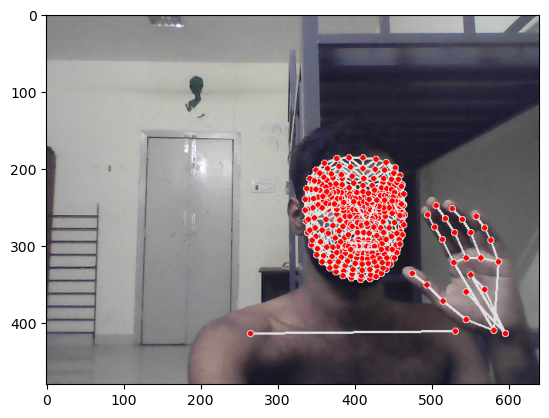

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
len(results.pose_landmarks.landmark)

33

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [8]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [9]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
result_test

array([ 0.55725265,  0.63328516, -1.21274114, ...,  0.        ,
        0.        ,  0.        ])

In [13]:
np.save('0', result_test)

In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MidPi_Data_5') 

# Actions that we try to detect
actions = np.array(['അ', 'ആ', 'ഇ' , 'ഈ' , 'ഉ', 'ഊ' , "ഋ" , 'എ' , 'ഏ' , 'ഐ' , 'ഒ' , 'ഓ'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [15]:
for action in actions: 
    # Check if the action directory exists
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    
    # Get the maximum directory index within the action directory
    try:
        dirmax = np.max([int(d) for d in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, d))])
    except ValueError:
        dirmax = 0
    
    # Loop through each sequence
    for sequence in range(1, no_sequences + 1):
        try: 
            # Create a new directory for the sequence within the action directory
            os.makedirs(os.path.join(action_path, str(dirmax + sequence)))
        except FileExistsError:
            # If the directory already exists, do nothing
            pass
        except Exception as e:
            # Handle any other exceptions
            print(f"Error creating directory: {e}")

In [16]:
import cv2
import numpy as np
import os
import mediapipe as mp

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

DATA_PATH = os.path.join('MidPi_Data_5') 

# Actions that we try to detect
actions = np.array(['അ', 'ആ', 'ഇ' , 'ഈ' , 'ഉ', 'ഊ' , "ഋ" , 'എ' , 'ഏ' , 'ഐ' ])

# Number of sequences and sequence length
no_sequences = 30
sequence_length = 30
start_folder = 0  # Start from 0 to avoid issues with directory creation

# Function for MediaPipe detection
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BGR to RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color conversion RGB to BGR
    return image, results

# Function to extract keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Function to draw styled landmarks
def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    # Draw right hand connections  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [63]:
import cv2
import numpy as np
import os
import mediapipe as mp

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

DATA_PATH = os.path.join('MidPi_Data_5') 

# Actions that we try to detect
actions = np.array(['അ', 'ആ', 'ഇ' , 'ഈ' , 'ഉ', 'ഊ' , "ഋ" , 'എ' , 'ഏ' , 'ഐ' , 'ഒ' , 'ഓ'])

# Number of sequences and sequence length
no_sequences = 30
sequence_length = 30
start_folder = 0  # Start from 0 to avoid issues with directory creation

# Function for MediaPipe detection
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion BGR to RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Color conversion RGB to BGR
    return image, results

# Function to extract keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Function to draw styled landmarks
def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    # Draw right hand connections  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

# Create necessary directories
for action in actions:
    for sequence in range(start_folder, start_folder + no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except FileExistsError:
            pass

cap = cv2.VideoCapture(0)

# Set up MediaPipe Holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(start_folder, start_folder + no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                if not ret:
                    break

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # Ensure directory exists before saving
                dir_path = os.path.join(DATA_PATH, action, str(sequence))
                if not os.path.exists(dir_path):
                    os.makedirs(dir_path)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(dir_path, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(8) & 0xFF == ord('q'):
                    break
            
            # Print after collecting keypoints for the entire sequence
            print(f'Saved keypoints for {action}, sequence {sequence}')

cap.release()
cv2.destroyAllWindows()


Saved keypoints for അ, sequence 0
Saved keypoints for അ, sequence 1
Saved keypoints for അ, sequence 2
Saved keypoints for അ, sequence 3
Saved keypoints for അ, sequence 4
Saved keypoints for അ, sequence 5
Saved keypoints for അ, sequence 6
Saved keypoints for അ, sequence 7
Saved keypoints for അ, sequence 8
Saved keypoints for അ, sequence 9
Saved keypoints for അ, sequence 10
Saved keypoints for അ, sequence 11
Saved keypoints for അ, sequence 12
Saved keypoints for അ, sequence 13
Saved keypoints for അ, sequence 14
Saved keypoints for അ, sequence 15
Saved keypoints for അ, sequence 16
Saved keypoints for അ, sequence 17
Saved keypoints for അ, sequence 18
Saved keypoints for അ, sequence 19
Saved keypoints for അ, sequence 20
Saved keypoints for അ, sequence 21
Saved keypoints for അ, sequence 22
Saved keypoints for അ, sequence 23
Saved keypoints for അ, sequence 24
Saved keypoints for അ, sequence 25
Saved keypoints for അ, sequence 26
Saved keypoints for അ, sequence 27
Saved keypoints for അ, sequenc

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
label_map

{'അ': 0,
 'ആ': 1,
 'ഇ': 2,
 'ഈ': 3,
 'ഉ': 4,
 'ഊ': 5,
 'ഋ': 6,
 'എ': 7,
 'ഏ': 8,
 'ഐ': 9}

In [20]:
import os
import numpy as np

DATA_PATH = 'MidPi_Data_5'  # Replace with your actual data path
actions = ['അ', 'ആ', 'ഇ' , 'ഈ' , 'ഉ', 'ഊ' , "ഋ" , 'എ' , 'ഏ' , 'ഐ' ]

sequence_length = 30  # Define the sequence length based on your data

# Create the label map starting from 6
label_map = {label: num for num, label in enumerate(actions)}
print(label_map)

sequences, labels = [], []
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    for sequence in range(30):  # Ensure we only iterate from 0 to 29
        window = []
        for frame_num in range(sequence_length):
            file_path = os.path.join(action_path, str(sequence), "{}.npy".format(frame_num))
            if os.path.exists(file_path):
                res = np.load(file_path)
                window.append(res)
            else:
                print(f"File not found: {file_path}")
        sequences.append(window)
        labels.append(label_map[action])

# Check the length of sequences and labels to ensure correctness
print(f"Number of sequences: {len(sequences)}")
print(f"Number of labels: {len(labels)}")


{'അ': 0, 'ആ': 1, 'ഇ': 2, 'ഈ': 3, 'ഉ': 4, 'ഊ': 5, 'ഋ': 6, 'എ': 7, 'ഏ': 8, 'ഐ': 9}
Number of sequences: 300
Number of labels: 300


In [21]:
np.array(sequences).shape

(300, 30, 1662)

In [22]:
np.array(labels).shape

(300,)

In [23]:
X = np.array(sequences)

In [24]:
X.shape

(300, 30, 1662)

In [25]:
y = to_categorical(labels).astype(int)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(15, 10)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [28]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [29]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(actions), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 596906 (2.28 MB)
Trainable params: 596906 

# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [32]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [33]:
actions[np.argmax(res[1])]

'ഈ'

In [34]:
actions[np.argmax(y_test[1])]

'ഏ'

In [35]:
model.save('action_5.h5')

C:\Users\amalk\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [37]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 94ms/step


In [38]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [39]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10.,  0.],
        [ 5.,  0.]],

       [[13.,  0.],
        [ 2.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[ 0., 15.],
        [ 0.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]],

       [[12.,  0.],
        [ 3.,  0.]],

       [[13.,  0.],
        [ 2.,  0.]],

       [[14.,  0.],
        [ 1.,  0.]]])

In [40]:
accuracy_score(ytrue, yhat)

0.0